# <p align = "center">Analysis of Suicide Rates From 1985 to 2016 </p>

As a student who has tackled depression and reading news about suicides all over the world, I have always wondered what factors play a role in suicide. This project seeks to explore the underlying factors. We will use a sample of 44,000 gather data from 141 different Countries, between the 80's to 2016.

"Suicide is one of the leading causes of death among all American adults and rates are increasing in both men and women" (SSM Health).


# Methods

In this mini-project, we will perform the following steps - 

    1.Data Wrangling
    2.Exploratory Data Analysis
    3.Machine Learning + Predictive Analytics 
    4.Conclusions
    5.References

# Questions


We will try to find the answers for the following questions during our analysis - 

1. Which year has the most & least suicides?


2. Which country has the most & least suicides?


3. Are certain age groups more inclined to suicide?


4. What is the relationship between gender and the number of suicides?

5. Additional analysis

# Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Data/Suicides.csv')

We will explore all of the varaibles in detail. While the suicide_no is what we would like to predict (we will do this in Section 4 - Machine Learning + Predictive Analytics ).

# 1. Data Wrangling

In [3]:
# first 5 data points

data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# summary of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# number of rows and columns in dataset

data.shape

(27820, 12)

In [6]:
# counts total row in each col. that have null values
# note: all the na columns are type Object

data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
# from above, we can see that, suicides_no & population, have null values.
# lets, fill the null values with zero using 'fillna'

data = data.fillna(0)

# Now, we have no null columns!

data.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [8]:
# list different age groups

data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [9]:
# lists the different countries

data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [10]:
# number of different Countries our dataset is from

data['country'].nunique()

101

In [11]:
# different country groups

data['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [12]:
# Replace 0 values with, NA

data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)



# replace NA values with, mean value

mean_value = data['population'].mean()

data['population'] = data['population'].fillna(mean_value)

In [13]:
# replace Na values with, mean value

mean_value = data['suicides_no'].mean()

data['suicides_no'] = data['suicides_no'].fillna(mean_value)

# 2. Exploratory Data Analysis

## Question 1: Which year has the most Suicides? Which year has the least Suicides ?

In [14]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value = data['suicides_no'].mean()
data['suicides_no'] = data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ", data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ", data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,20996,3
country,Russian Federation,Albania
year,1994,1987
sex,male,male
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200,21800
suicides/100k pop,117.3,4.59
country-year,Russian Federation1994,Albania1987
HDI for year,0.0,0.0
gdp_for_year ($),"395,077,301,248","2,156,624,900"


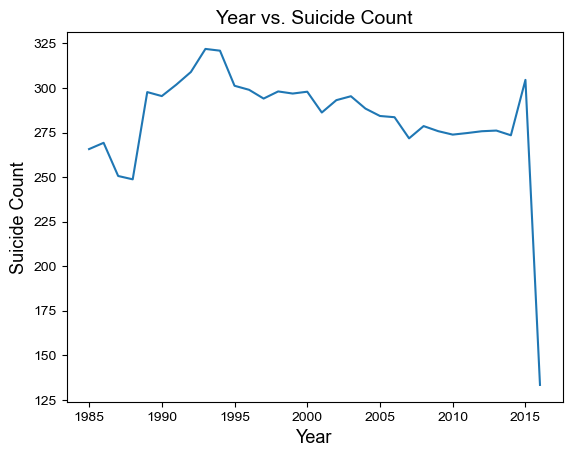

In [15]:
# year-wise analysis of mean number sucidies of each year

data.groupby('year')['suicides_no'].mean().plot()


#setup the title and labels of the figure.

plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)


#setup the figure size.

sns.set(rc = {'figure.figsize':(10,5)})
sns.set_style("darkgrid")

From observing our Time Series Line Plot, we can see a sharp drop in suicides in 1995. This decrease could be due to awareness of suicide & mental health in the 90s, as well as improved recogniztion of those at risk. This is indeed accurate, as the research,"Suicide in the elderly" supports this claim,

1. "Female suicide rates have shown a similar overall decrease, reducing by between 45 and 60% during the years 1983–1995 in the 45–84 age group.
2. elderly women, however, retain the highest rates throughout the life span (1)
3. ratio of male to female elderly suicide deaths remains approximately 3:1
4. These trends in suicide rates are probably due to:
A) improved detection of those at risk
B) aggressive treatment of mental illness in the elderly" (Suicide in the elderly, General Practice Notebook).
        



## Conclusion
This confirms, that 1987 had the lowest sucide number, while 1994 had the highest suicide number.

## Question 2: Which country has the most Suicides ? Which country has the least Suicides ?

In [16]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,3,20996
country,Albania,Russian Federation
year,1987,1994
sex,male,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,21800,19044200
suicides/100k pop,4.59,117.3
country-year,Albania1987,Russian Federation1994
HDI for year,0.0,0.0
gdp_for_year ($),"2,156,624,900","395,077,301,248"


Lets make a new column to calculate the 'Suicide : Population Size' Ratio, to better understand our data

In [17]:
#calculate mean of suicides_no col

meanSuicide = data['suicides_no'].mean()


#calculate mean of pop. col

meanPop = data['population'].mean()

#NOTE: You may replace NA values with mean, OR Drop them, I showed both
    
# drops any Na rows

data = data.dropna()    


# Replace 0 or NaN suicides_no, with the mean Suicide    

data['suicides_no'] = data['suicides_no'].replace(np.NAN,meanSuicide)


# Replace 0 or NaN populations, with the mean Populations

data['population'] = data['population'].replace(np.NAN,meanPop)
data['population'] = data['population'].replace(0,meanPop)

In [18]:
# peform operation

data['suicide_per_pop'] = data['suicides_no']/data['population']


# another way of peforming the operation from above:
# data['suicide_per_pop'] = data.apply(lambda row: row.suicides_no / row.population, axis = 1) 

data.tail(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop
27817,Uzbekistan,2014,male,5-14 years,60.0,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0.000022
27818,Uzbekistan,2014,female,5-14 years,44.0,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,0.000017
27819,Uzbekistan,2014,female,55-74 years,21.0,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers,0.000015


In [19]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Kiribati
Country Which Has Lowest suicide_per_pop  :  Thailand


,25061,14059
country,Thailand,Kiribati
year,1994,1991
sex,male,male
age,5-14 years,75+ years
suicides_no,1.0,286.691023
population,5821000,278
suicides/100k pop,0.02,0.0
country-year,Thailand1994,Kiribati1991
HDI for year,0.0,0.0
gdp_for_year ($),"146,683,499,006","47,515,189"


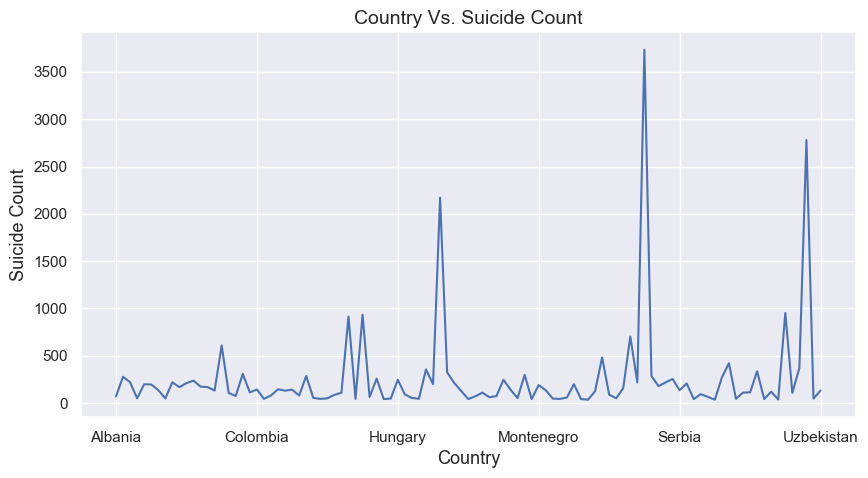

In [20]:
# year-wise analysis of mean number sucidies of each year

data.groupby('country')['suicides_no'].mean().plot()


# info = pd.DataFrame(data['country'].sort_values(ascending = False))


# setup the title and labels of the figure.

plt.title("Country Vs. Suicide Count",fontsize = 14)
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)


# setup the figure size.

sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("darkgrid")

Both the graph & find_minmax funciton above, confirm that Albania had the lowest suicide count, while Zimbabwe & Russian Federation, 
had the largest suicide count. A reason the Russian Federations may have a large suicide count may be that they have a very large population (144.5 million, while Albania only has about 3 million). It has been reported that Russian levels of alcohol consumption plays an immense role in it's large suicide count, but their is a lack of data to support this due to Soviet secrecy.

From looking at the ratio's above, Rodrigues has the highest suicide per population ratio. 
While Egypt has the smallest ratio of Suicides per Population. 

## Question 3: Are certain age groups more inclined to suicide?


In [21]:
sample = data.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop
11458,Hungary,1998,male,5-14 years,5.0,635890,0.79,Hungary1998,0.000,"48,770,466,839",5010,Millenials,0.000008
7500,Denmark,2000,male,5-14 years,1.0,332762,0.30,Denmark2000,0.862,"164,158,800,460",32841,Millenials,0.000003
13519,Japan,1997,female,5-14 years,19.0,6494000,0.29,Japan1997,0.000,"4,414,732,843,544",37080,Millenials,0.000003


In [22]:
# grabs first 2 chars from Age Column

data['AgeNum'] = data['age'].str[:2]


# remove all instances of dash -

data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))


# now, convert it to type int (not Object)

data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int64

In [23]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"

# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

27817            Adolescent
27818            Adolescent
27819    Middle_Aged_Adults
Name: AgeCategory, dtype: object

In [24]:
data['AgeNum'].tail(3)

27817     5
27818     5
27819    55
Name: AgeNum, dtype: int64

In [25]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,0.0,"2,156,624,900",796,Generation X,0.000067,15,Adolescent
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,0.0,"2,156,624,900",796,Silent,0.000052,35,Middle_Aged_Adults
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,0.0,"2,156,624,900",796,Generation X,0.000048,15,Adolescent


Text(8.194444444444445, 0.5, 'Suicide Count')

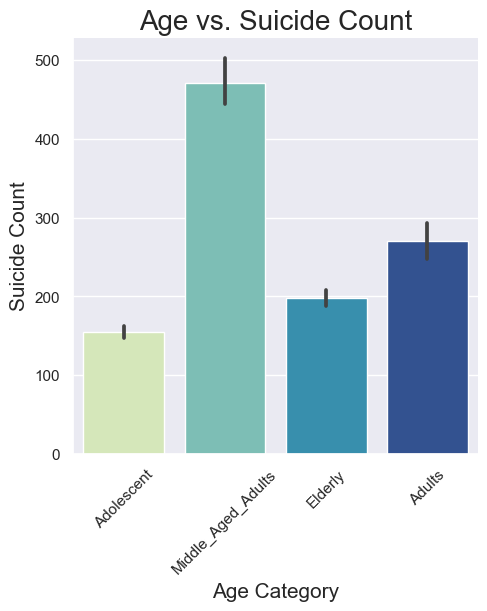

In [26]:
sns.catplot(x = "AgeCategory", y = "suicides_no", palette = "YlGnBu", kind = "bar", data = data)

plt.xticks(rotation = 45)

plt.title('Age vs. Suicide Count',size = 20)

plt.xlabel('Age Category',size = 15)

plt.ylabel('Suicide Count',size = 15)

The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as  middle aged adults.

## Question 4: What is the relationship between the gender and the number of suicides? 

In [27]:
# there is an equal number of Males & Females in our data

data['sex'].value_counts()

sex
male      13910
female    13910
Name: count, dtype: int64

Note: Hue, allows us to add another dimensionality to our analysis!

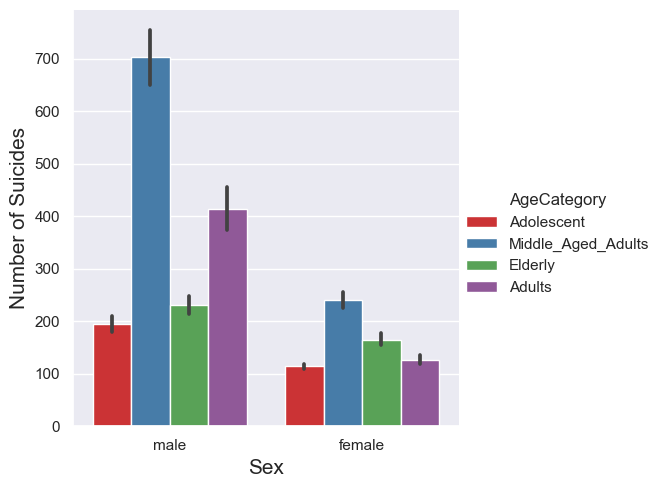

In [28]:
sns.catplot(x = "sex", y = "suicides_no", hue = "AgeCategory", kind = "bar", data = data, palette = "Set1")

plt.xlabel('Sex',size = 15)

plt.ylabel('Number of Suicides',size = 15)

sns.set_style("darkgrid")

Suicide is one of the leading causes of death among all Americans adults. Data show heightend differences in suicide for different sexes. It's evident that males are more inclined to suicide. For Females, the 4 age cateogries seem to level off at 150. We can't say the same for males. Male adults & male middle aged adults are at very high risk of suicide. Both genders show middle aged adults as the leading age group of suicide.

"In 2017, men died by suicide 3.54 times more often than women. Middle-aged white men, in particular, are susceptible" (SMM Health).

## Question 5: Additional Analysis

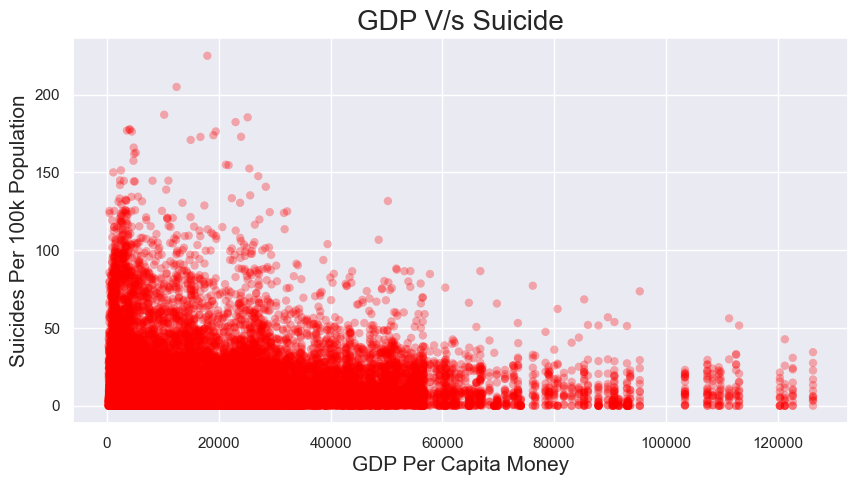

In [29]:
# suicide rate compared to the per capita GDP

plt.title("GDP V/s Suicide",fontsize = 20)
plt.xlabel('GDP Per Capita Money',fontsize = 15)
plt.ylabel('Suicides Per 100k Population',fontsize = 15)

sns.set(rc = {'figure.figsize':(10,10)})

sns.scatterplot(data = data, x = "gdp_per_capita ($)", y = "suicides/100k pop", alpha = 0.3, color = "red", edgecolor = "none")

sns.set_style("darkgrid")

# 3. Machine Learning And Predictive Analytics 

Our goal in this section is to build a multiple linear regression model that will be trained to 
	understand correlation between our features and our predictor. 
	We want to predict Y (suicides count), given a a specific year, pertaining to a specfic age group & gender. 

In [30]:
newData = data.loc[:,['year','sex','AgeNum','suicides_no']]

newData.head(3)

,year,sex,AgeNum,suicides_no
0,1987,male,15,21.0
1,1987,male,35,16.0
2,1987,female,15,14.0


In [31]:
# grab the every col except last
X = newData.iloc[:, :-1].values

# grab last col
y = newData.iloc[:, -1].values

# Encoding Categorical data

Here we will perform `OneHotEncoding` on the Suicide_no Column

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')

X = np.array(ct.fit_transform(X))

In [33]:
# the Gender feature, is now encoded using 0's & 1's
X

array([[0.0, 1.0, 1987, 15],
       [0.0, 1.0, 1987, 35],
       [1.0, 0.0, 1987, 15],
       ...,
       [0.0, 1.0, 2014, 5],
       [1.0, 0.0, 2014, 5],
       [1.0, 0.0, 2014, 55]], dtype=object)

In [34]:
y

array([21., 16., 14., ..., 60., 44., 21.])

# Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [36]:
print("train data\n",x_train)

print("-"*20)

print("Test data\n",x_test)

train data
 [[1.0 0.0 1996 25]
 [1.0 0.0 2003 35]
 [1.0 0.0 1996 25]
 ...
 [0.0 1.0 2008 35]
 [1.0 0.0 1994 25]
 [0.0 1.0 2008 75]]
--------------------
Test data
 [[1.0 0.0 1999 25]
 [0.0 1.0 1992 5]
 [1.0 0.0 1989 55]
 ...
 [1.0 0.0 1997 35]
 [0.0 1.0 1995 15]
 [0.0 1.0 1995 55]]


In [37]:
print("Y train\n",y_train)

print("Y test\n",y_test)

Y train
 [ 286.69102341   24.            7.         ... 1241.            9.
    2.        ]
Y test
 [ 117.   11. 1432. ...  219.   56.  473.]


# Training the Multiple Linear Regression model on the Training set

In [38]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

# Predicting the model

In [39]:
# we are predicting the suicide count given certain demographics
# A 55 year old male, in 2001 
# suicide count of about 187.

print(regressor.predict([[1,0,2001,55]]))

[196.125]


# 4. Conclusions

1. While suicide rates dipped in the 80s, potentially due to increased awareness and recognition of mental health struggles, they've unfortunately climbed again in recent years.

2. Though lack of Soviet-era data makes it difficult to confirm, Russia's high suicide rate may be linked to widespread alcohol consumption. 

3. The data paints a troubling picture: middle-aged adults (30-60) bear the brunt of suicides, with elderly and adolescents experiencing roughly half the rate.

4. Sadly, suicide ranks high among causes of death for all US adults. Notably, men are significantly more likely to take their own lives than women, with mental health playing a key role in the tragedy. 

# 5. References


October 14, 2019 by SSM Health. “Why Are Middle-Aged White Men More Likely to Die by Suicide?” SSM Health, www.ssmhealth.com/blogs/ssm-health-matters/october-2019/middle-aged-men-more-likely-to-die-by-suicide. 